In [1]:
import pandas as pd
import urllib3
import requests
import numpy as np
import datetime
import requests
import re
import matplotlib
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import seaborn as sns
import datetime
matplotlib.rcParams['pdf.fonttype'] = 42

In [26]:
df=pd.read_csv("cdcCovidData_Dec16-22.csv")

In [52]:
KyData = df[(df["state"] == "KY") & (df["County"] != "Unallocated, KY")]

In [53]:
KyData["DeathsPer100K"].dropna(inplace=True)

<ipython-input-53-8ffd2b9d09ed>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  KyData["DeathsPer100K"].dropna(inplace=True)


In [70]:
KyData.columns

Index(['County', 'fips', 'state', 'pop', 'popAsPercentStatePopulation',
       'IHE with >5000 full-time enrollment', 'Full-time enrollment',
       'Full-time enrollment as a percent of the population',
       'CasesAsPctNationalTotal', 'Cases', 'CasesPer100K', 'Deaths',
       'DeathsPer100K', 'CasesPctChangeFromPreviousWeek ',
       'DeathsPctChangeFromPreviousWeek ', 'CumulativeCases',
       'CumulativeDeaths', 'RapidRise_Last_14Days', 'AreaOfConcernCategory',
       'RapidRiserCategory', 'labTestPositivityRate ',
       'TotalPCRdiagnosticTests', 'PCRper100K', 'MedianTestLatency',
       'PctTestsResultedIn3orfewerdays', 'AbsoluteChange_testPositivityRate',
       'PctChange_TotalPCRdiagnosticTests', 'AbsoluteChange_testingLatency',
       'AbsoluteChange_PctTestsResultedIn3orfewerdays',
       'testPositivityRateChangeFrom2WeeksAgo',
       'PctChange_totalDiagonisticFromTwoWeeksAgo',
       'AbsoluteChange_testingLatency_fromTwoWeeksAgo',
       'AbsoluteChangeFrom2WeeksAgo_Pc

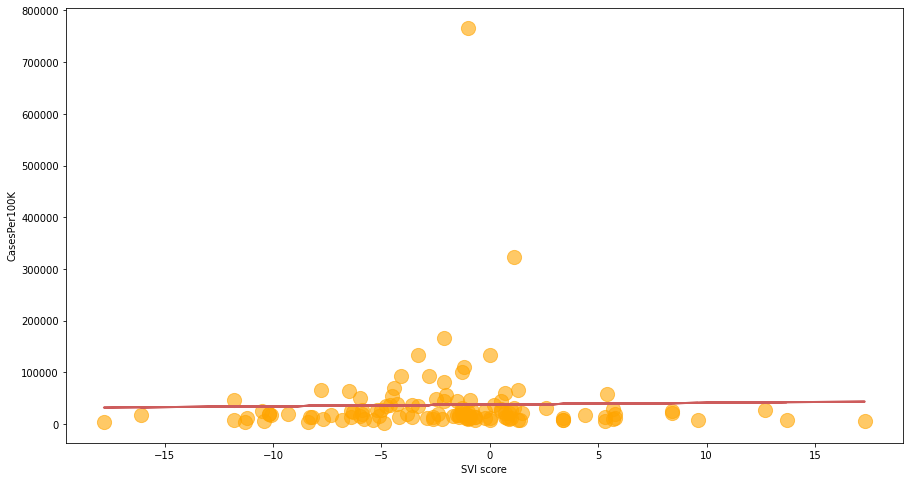

In [75]:
# KyDataFiltered = KyData[KyData["pop"] < 300000]
#setting variables
x = KyData[['testPositivityRateChangeFrom2WeeksAgo']].values
y = KyData[['pop']].values

### init the regression
my_regression = LinearRegression()

### fit our variables into it
my_regression.fit(x,y)

plt.figure(figsize=(15,8))
# fig.suptitle('Correlation between food insecurity rate and voter turnout')
plt.xlabel('SVI score')
plt.ylabel('CasesPer100K')

### make the scatter in Blue
plt.scatter(x,y,color='orange',alpha=0.6, s=200)

### draw regression in red
## predict where the y is based on x
plt.plot(x, my_regression.predict(x), color='indianred', linewidth='2')

# plt.savefig("food_insecurity_plot.svg", format="svg")

,County,fips,state,pop,popAsPercentStatePopulation,IHE with >5000 full-time enrollment,Full-time enrollment,Full-time enrollment as a percent of the population,CasesAsPctNationalTotal,Cases,...,pct_poverty,pctOver65Years,AvgHouseholdSize,pct_nonHispanicblack,pct_hispanic,pct_nativeAmericanAlaskanNative,pct_asian,SVI_score,CCVI_score,forecasted_case_trajectory
330,"Kenton County, KY",21117,KY,166998.0,3.7,NaN,1510.0,0.9,0.1,878.0,...,13.0,15.0,2.6,5.0,3.0,0.0,1.0,0.34,0.22,Uncertain
404,"Boone County, KY",21015,KY,133581.0,3.0,NaN,NaN,0.0,0.1,715.0,...,7.0,14.0,2.8,4.0,4.0,0.0,2.0,0.13,0.24,Likely Decreasing
413,"Warren County, KY",21227,KY,132896.0,3.0,1.0,13228.0,10.0,0.1,686.0,...,17.0,13.0,2.5,9.0,6.0,0.0,5.0,0.71,0.25,Uncertain
439,"Pulaski County, KY",21199,KY,64979.0,1.5,NaN,NaN,0.0,0.0,634.0,...,24.0,19.0,2.5,1.0,3.0,0.0,1.0,0.74,0.55,Uncertain
501,"Daviess County, KY",21059,KY,101511.0,2.3,NaN,1555.0,1.5,0.0,547.0,...,16.0,17.0,2.4,5.0,3.0,0.0,2.0,0.62,0.30,Uncertain
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2858,"Elliott County, KY",21063,KY,7517.0,0.2,NaN,NaN,0.0,0.0,16.0,...,30.0,20.0,2.4,4.0,1.0,0.0,0.0,0.72,0.89,Uncertain
2886,"Ballard County, KY",21007,KY,7888.0,0.2,NaN,NaN,0.0,0.0,15.0,...,17.0,22.0,2.6,3.0,1.0,0.0,1.0,0.45,0.83,Uncertain
2887,"Fulton County, KY",21075,KY,5969.0,0.1,NaN,NaN,0.0,0.0,15.0,...,30.0,21.0,2.3,24.0,2.0,1.0,1.0,0.87,0.99,Uncertain
2909,"Hickman County, KY",21105,KY,4380.0,0.1,NaN,NaN,0.0,0.0,14.0,...,15.0,26.0,2.4,9.0,2.0,0.0,0.0,0.57,0.94,Uncertain
